# **PROJECT 3 & 4**

Name: Ojaswin Kohli

Intern code: OGTIPOKDS440

Batch: OGTIP - DS - AUS - 08

Google collab link for the project:
https://colab.research.google.com/drive/1uK2_Xqw_W6_o16T0ahrDImrt8RzdhmEF?usp=sharing

In [62]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate, cross_val_score, KFold
#metrics calculation
from sklearn import metrics

In [63]:
data = pd.read_csv('/content/Data.csv')
data.head(5)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [64]:
data.shape

(14731, 22)

In [65]:
# Descriptive statistics
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


# Descriptive Statistics
## Page Visits and Durations:
1. The average number of visits to the homepage (HomePage) is approximately 2.25 with a wide variation (standard deviation of about 3.27), suggesting diverse user engagement with the homepage.
2. The HomePage_Duration and LandingPage_Duration have a wide range of values with high standard deviations, indicating significant variability in the time users spend on these pages.
3. The ProductDescriptionPage sees an average of 31.59 visits, with a high standard deviation (44.86), highlighting that some users engage deeply with product descriptions, while others may not.
## Google Metrics:
1. GoogleMetric:Bounce Rates and GoogleMetric:Exit Rates have low averages (0.023 and 0.044 respectively), but their standard deviations suggest variability in user exit behavior.
2. The GoogleMetric:Page Values show an average of 4.80, with a very high standard deviation (16.82), indicating that while some pages are highly valuable, many are not, leading to a skewed distribution.
## User Information and Behavior:
1. The SeasonalPurchase average is low (0.064), suggesting infrequent seasonal purchases.
2. OS and SearchEngine columns indicate a diversity in the operating systems used and search engines through which users arrive at the site.
3. The Zone and Type of Traffic fields show a reasonable spread of values, suggesting diverse geographical and traffic sources.
4. WeekendPurchase has a low average (0.234), indicating that purchases are not significantly higher on weekends.
# Inference:
The dataset reveals varied user engagement with different website pages, significant variability in session durations, and diverse user behaviors and sources. While Google metrics suggest a generally effective user experience, the high variability and specific high-value pages indicate opportunities for targeted improvements. The data also underscores the need for strategies addressing diverse user preferences and behaviors, particularly to enhance product page engagement and convert visits into purchases.

In [66]:
data.shape

(14731, 22)

This dataset has 14731 rows and 22 columns.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

Inference:
It can be seen from the above analysis that the only 'Made_Purchase' has values
for all 14731 rows. So, we need to do missing value treatement before proceeding
with the subsequent tasks on the dataset.

In [68]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
ProductDescriptionPage_Duration,167,1.1
HomePage,153,1.0
LandingPage,153,1.0
GoogleMetric:Bounce Rates,151,1.0
SeasonalPurchase,150,1.0
HomePage_Duration,150,1.0
Gender,145,1.0
Cookies Setting,144,1.0
Month_SeasonalPurchase,144,1.0
CustomerType,144,1.0


**MISSING VALUE TREATMENT**

In [69]:
data.head(5)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [70]:
data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

In [71]:
# Missing values treatment for continuous data
data['HomePage'] = data['HomePage'].interpolate(direction='forward')
data['HomePage_Duration'] = data['HomePage_Duration'].interpolate(direction='forward')
data['LandingPage'] = data['LandingPage'].interpolate(direction='forward')
data['LandingPage_Duration'] = data['LandingPage_Duration'].interpolate(direction='forward')
data['ProductDescriptionPage'] = data['ProductDescriptionPage'].interpolate(direction='forward')
data['ProductDescriptionPage_Duration'] = data['ProductDescriptionPage_Duration'].interpolate(direction='forward')
data['GoogleMetric:Bounce Rates'] = data['GoogleMetric:Bounce Rates'].interpolate(direction = 'forward')
data['GoogleMetric:Exit Rates'] = data['GoogleMetric:Exit Rates'].interpolate(direction='forward')
data['GoogleMetric:Page Values'] = data['GoogleMetric:Page Values'].interpolate(direction='forward')
data['SeasonalPurchase'] = data['SeasonalPurchase'].interpolate(direction='forward')

# Missing value treatment for categorical values
data['Month_SeasonalPurchase'] = data['Month_SeasonalPurchase'].ffill()
data['OS'] = data['OS'].ffill()
data['SearchEngine'] = data['SearchEngine'].ffill()
data['Zone'] = data['Zone'].ffill()
data['Type of Traffic'] = data['Type of Traffic'].ffill()
data['CustomerType'] = data['CustomerType'].ffill()
data['Gender'] = data['Gender'].ffill()
data['Cookies Setting'] = data['Cookies Setting'].ffill()
data['Education'] = data['Education'].ffill()
data['Marital Status'] = data['Marital Status'].ffill()
data['WeekendPurchase'] = data['WeekendPurchase'].ffill()

After missing values treatment,

In [72]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
HomePage,0,0.0
HomePage_Duration,0,0.0
WeekendPurchase,0,0.0
Marital Status,0,0.0
Education,0,0.0
Cookies Setting,0,0.0
Gender,0,0.0
CustomerType,0,0.0
Type of Traffic,0,0.0
Zone,0,0.0


In [73]:
data.info

<bound method DataFrame.info of        HomePage  HomePage_Duration  LandingPage  LandingPage_Duration  \
0           0.0           0.000000          0.0                   0.0   
1           0.0           0.000000          0.0                   0.0   
2           0.0           0.000000          0.0                   0.0   
3           0.0           0.000000          0.0                   0.0   
4           1.0           0.000000          0.0                   0.0   
...         ...                ...          ...                   ...   
14726       1.0           4.000000          0.0                   0.0   
14727       8.0         117.023809          2.0                  57.0   
14728       2.0          75.600000          2.0                 652.8   
14729       0.0           0.000000          0.0                   0.0   
14730       0.0           0.000000          0.0                   0.0   

       ProductDescriptionPage  ProductDescriptionPage_Duration  \
0                        

Since there are no null or N/A values in any row after
missing value treatment, we shall proceed with outlier detection and removal.

**EDA-OUTLIER DETECTION**

In [74]:
# Identify columns with continuous data for the outlier detection
continuous_columns = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration',
                     'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values',
                     'SeasonalPurchase']

1 HomePage_Duration
2 LandingPage_Duration
3 ProductDescriptionPage_Duration
4 GoogleMetric:Bounce Rates
5 GoogleMetric:Exit Rates
6 GoogleMetric:Page Values
7 SeasonalPurchase


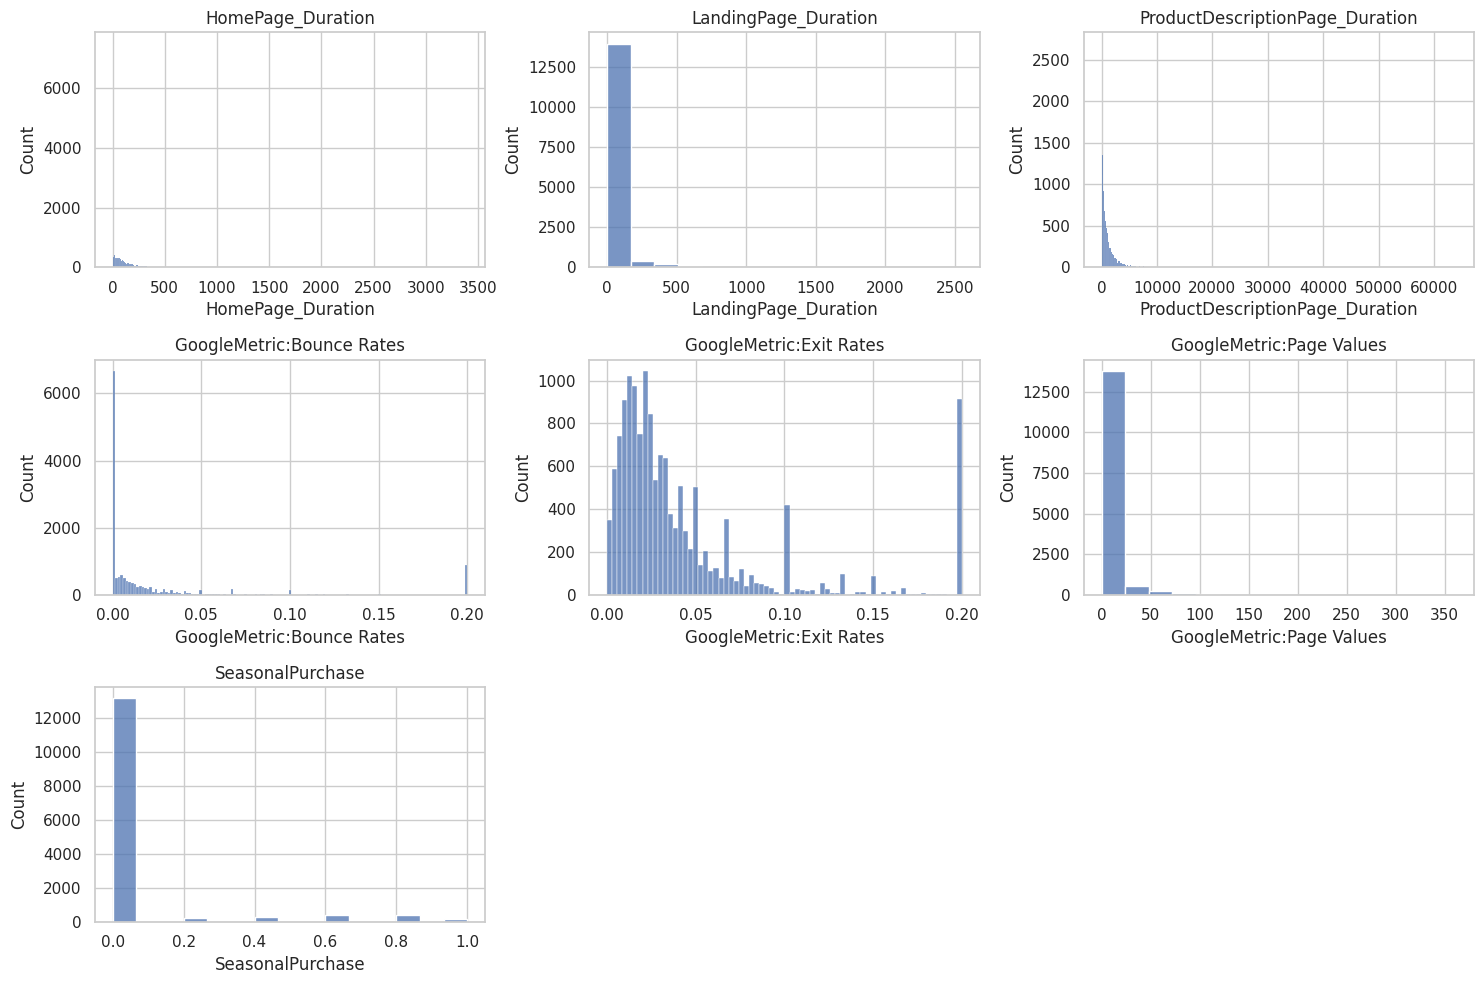

In [75]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    print(i, col)
    plt.subplot(3, 3, i)  # Adjust the grid dimensions (3, 3) as needed
    sns.histplot(data=data, x=col)  # Pass the DataFrame with the data parameter
    plt.title(col)

plt.tight_layout()
plt.show()

Inference: The above histograms indicate that several variables are highly right-skewed, meaning that the majority of the data points cluster near a lower range of values while there are a few very large values.

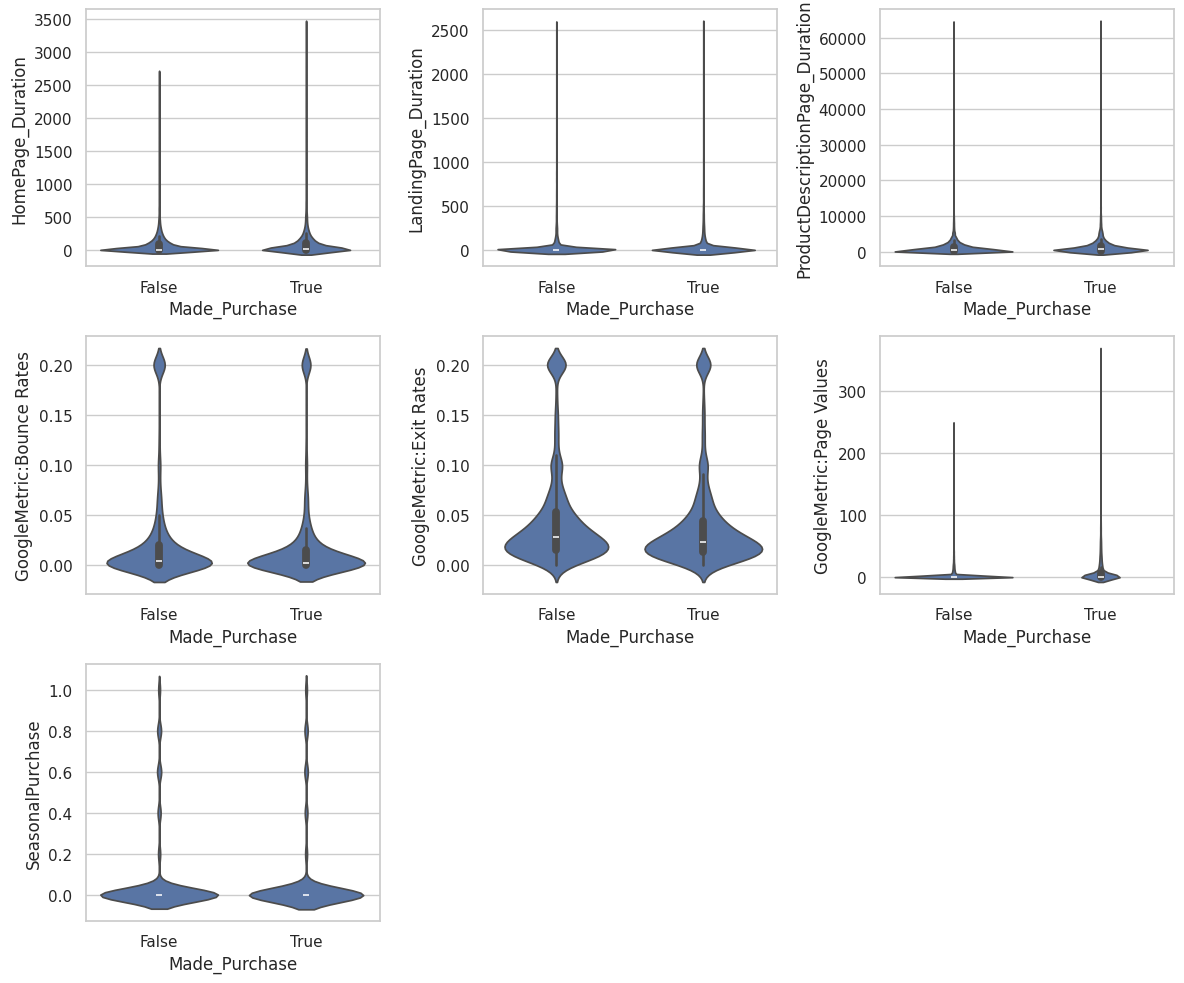

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Made_Purchase',y=col,data=data)

plt.tight_layout()
plt.show()

Inference:

1. HomePage_Duration: The plots for both False and True outcomes show a dense region near the zero mark, indicating that many users spend little to no time on the homepage, regardless of the purchase outcome. There are some outliers who spend more time, particularly among those who made a purchase.
2. LandingPage_Duration: Similarly, for the landing page duration, both groups have a dense area near zero, with outliers indicating longer durations.
3. ProductDescriptionPage_Duration: The distribution for the False outcome is tightly concentrated near zero, whereas the distribution for the True outcome is broader and includes higher values, suggesting that users who spend more time on the product description page are more likely to make a purchase.
4. GoogleMetric:Bounce Rates: The violin plots for bounce rates are similar for both groups.
5. GoogleMetric:Exit Rates: Exit rates show a similar pattern to bounce rates, with both outcomes featuring a concentrated distribution near lower values. There does not appear to be a significant difference between the two groups based on this plot alone.
6. GoogleMetric:Page Values: There's a noticeable difference in the page value distributions between the two outcomes. The True outcome for those who made a purchase shows a long tail towards higher values, suggesting that higher page values are associated with a higher likelihood of making a purchase.
7. SeasonalPurchase: The distributions for seasonal purchases are nearly identical for both outcomes, suggesting this metric does not differentiate well between those who did and did not make a purchase.


From this analysis, it can be seen that ProductDescriptionPage_Duration and GoogleMetric:Page Values are the two features with distributions that differ most significantly between users who did and did not make a purchase. These could potentially be strong predictors of purchase behavior. The other metrics show less differentiation between the two outcomes based on these violin plots.

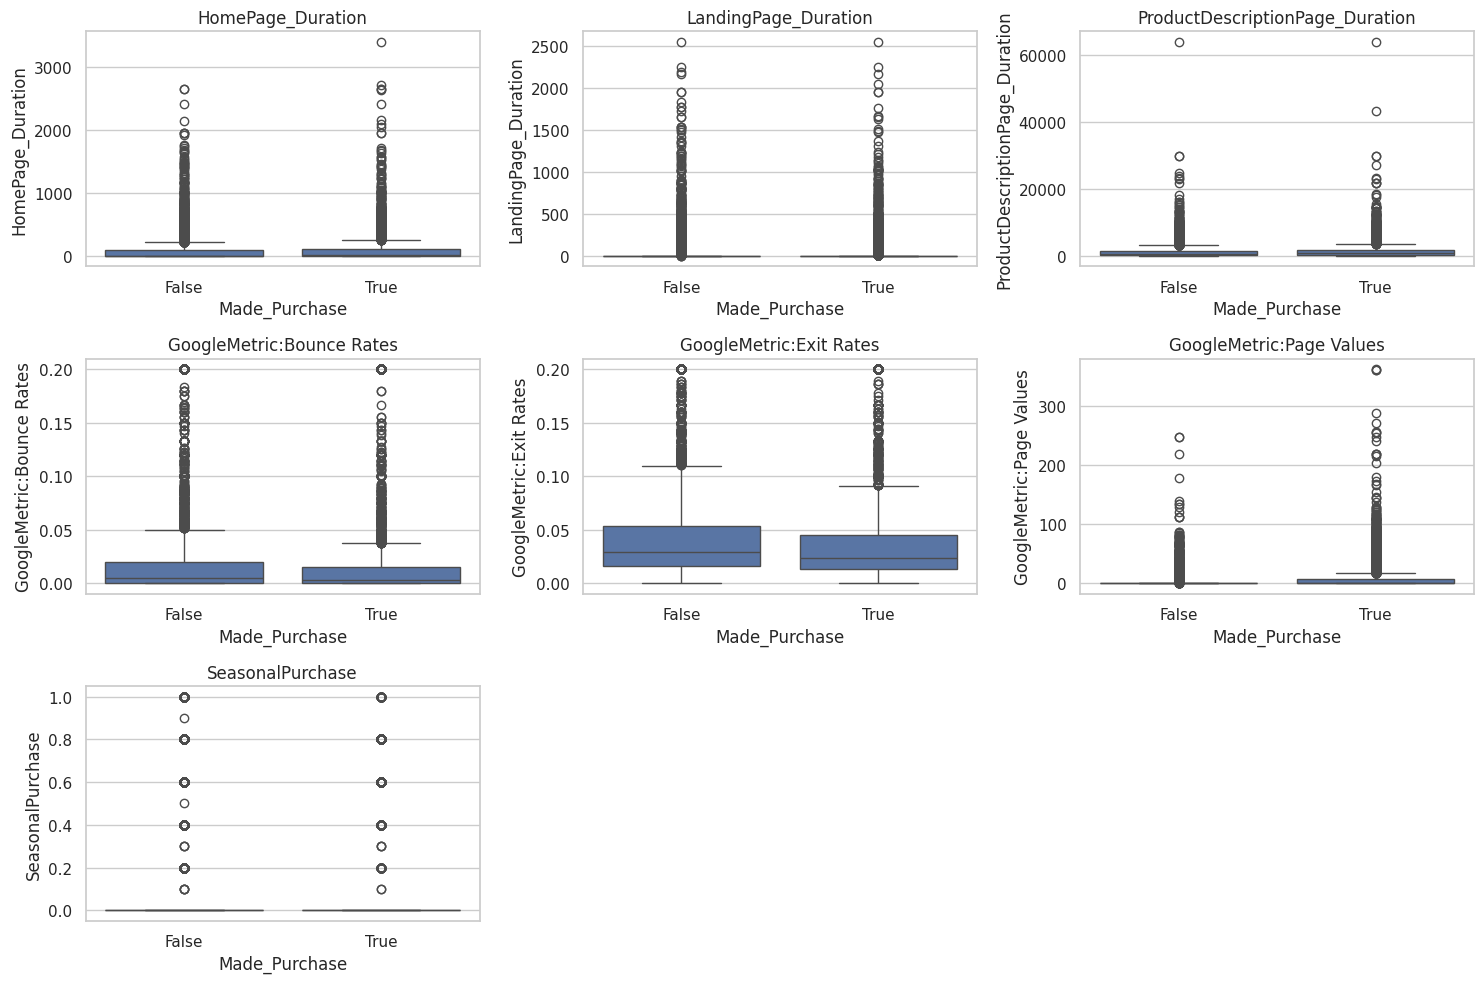

In [77]:
# Box plots with respect to Made_Purchase
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Made_Purchase', y=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show()

Inference:
In comparison to the violin plots, the above boxplots provide a more detailed view of the central tendency and spread of the data, especially the median and IQR. They reinforce the earlier conclusion that ProductDescriptionPage_Duration and GoogleMetric:Page Values are significant indicators of whether the purchase will be made or not. The presence of outliers across almost all metrics suggests that there are exceptional cases in user behavior that deviate from the typical patterns.

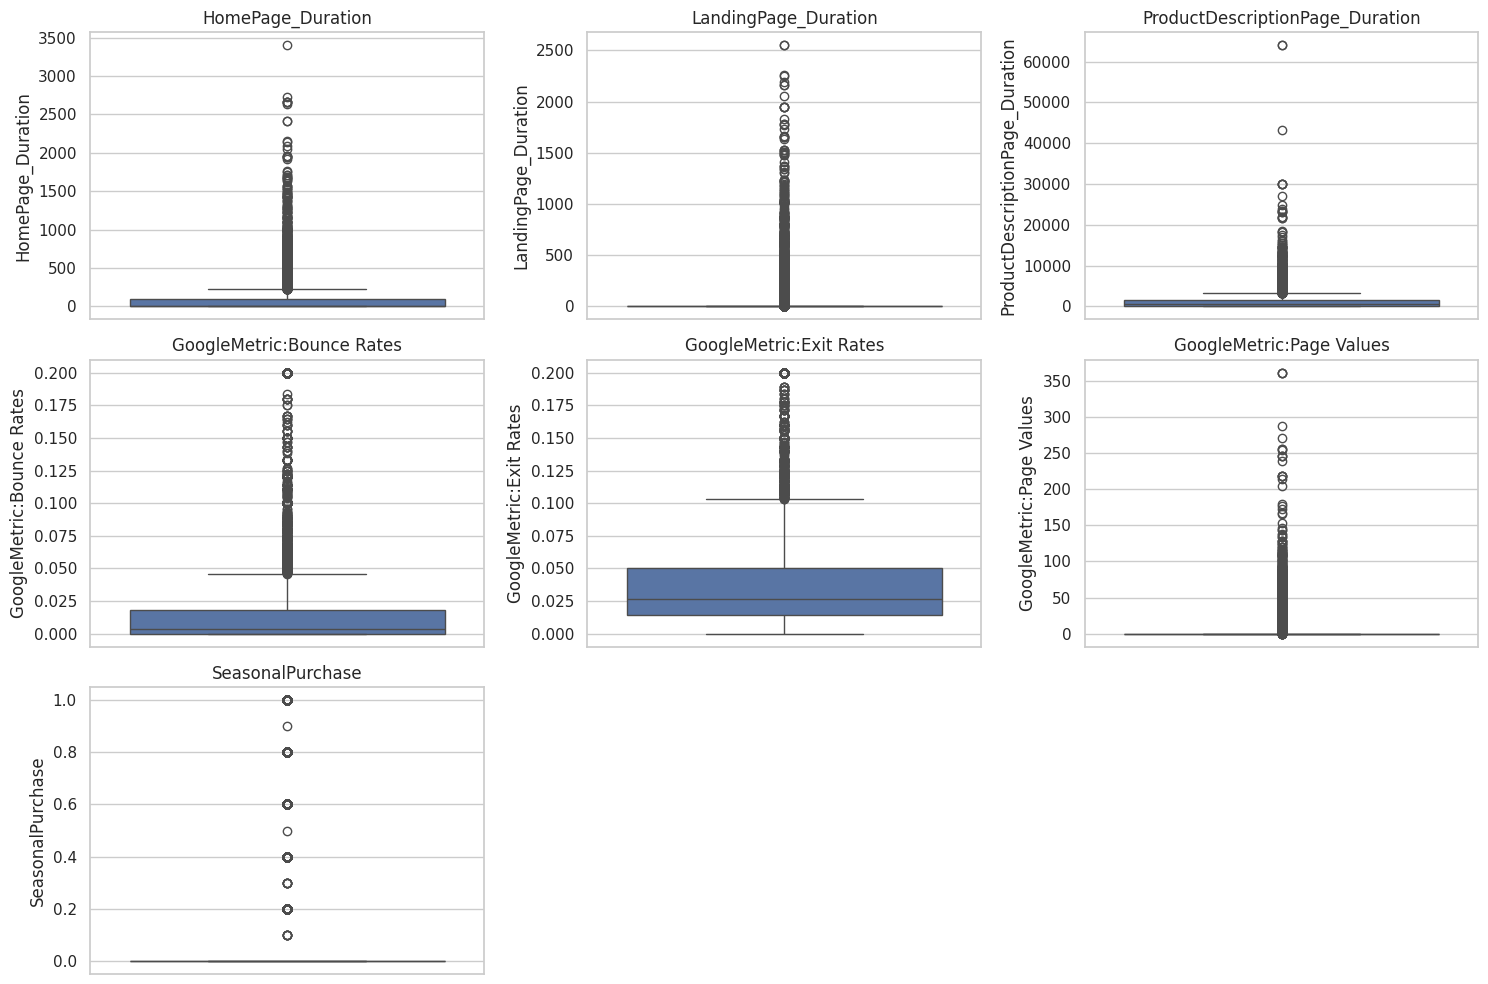

In [78]:
# Box plots with potential outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

Inference:
The above boxplots show a general trend of users spending varying amounts of time across different pages, with some pages having much higher engagement or relevance to conversion as indicated by the duration and page value metrics.
A significant presence of outliers across almost all metrics suggests that there are exceptional cases in user behavior that deviate from the typical patterns.

In [79]:
# Apply the IQR method to remove outliers
data_no_outliers = data[continuous_columns]
Q1 = data_no_outliers.quantile(0.25)
Q3 = data_no_outliers.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data_no_outliers[~((data_no_outliers < (Q1 - (1.5 * IQR))) |
 (data_no_outliers > (Q3 + (1.5 * IQR)))).any(axis=1)]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal:", data_no_outliers.shape)


Data shape before outlier removal: (14731, 22)
Data shape after outlier removal: (6742, 7)


Inference:
After careful consideration of the dataset comprising consumer website web engagement data and user behavior, it has been observed that the application of outlier detection using Interquartile Range (IQR), results in the exclusion of a substantial portion of the dataset (from 14,731 to 6,742 entries). Given that each data point potentially represents a unique user interaction with the consumer website, the elimination of these data points could lead to the loss of valuable insights into user behavior patterns, especially those that are atypical but genuine.

Furthermore, outlier removal in this context may bias the analysis by favoring average user behaviors and undermining the significance of high-value actions or users, which are often the primary focus in web-based business models. Hence, the decision to not to do outlier detection is rooted in the intent to preserve the integrity of the dataset and to ensure that subsequent analyses reflect the true diversity of user interactions with the website

In [80]:
target = 'Made_Purchase'
X = data.drop('Made_Purchase', axis=1)
y = data['Made_Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Initialize the label encoder
labelencoder = LabelEncoder()

# List of categorical columns you want to encode
categorical_columns = ['Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = labelencoder.fit_transform(data[column])

for column in categorical_columns:
    print("Unique values in", column, ":", data[column].unique())

Unique values in Month_SeasonalPurchase : [2 5 6 8 4 3 0 7 9 1]
Unique values in OS : [3 2 1 0 6 5 7 4]
Unique values in SearchEngine : [ 0  1  2  3  4  5  7  8  9  6 11 12 10]
Unique values in Zone : [8 1 0 2 3 4 6 7 5]
Unique values in Type of Traffic : [ 2  3  4  1  0  5  6  8  7  9 10 11 12 13 14 18 15 16 17 19]
Unique values in CustomerType : [2 0 1]
Unique values in Gender : [2 0 1]
Unique values in Cookies Setting : [1 0 2]
Unique values in Education : [2 3 0 1]
Unique values in Marital Status : [1 0 2]


In [82]:
# Separate independent and dependent variables
X = data.drop(['Made_Purchase'], axis=1)
y = data['Made_Purchase']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Perform PCA
from sklearn.decomposition import PCA

print("Shape of X_train_scaled:", X_train_scaled.shape)

pca = PCA(n_components=2)
principalComponents_train = pca.fit_transform(X_train_scaled)
principalComponents_test = pca.fit_transform(X_test_scaled)

Shape of X_train_scaled: (11784, 21)


# 1. Random Forest Classifier Algorithm

## 1.1. Training

In [85]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(principalComponents_train, y_train)
#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(principalComponents_train)
#calcuate accuracy
random_forest.score(principalComponents_train, y_train)
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(acc_random_forest)

86.16


Inference:
The Random Forest model achieved an accuracy of 86.16% on the training set. This high accuracy indicates that the model is able to learn well from the training data and effectively classify the outcomes based on the principal components derived from PCA.

In [86]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6628,  552],
       [1079, 3525]])

Inference:
The confusion matrix for the training data shows that the model predicted 6628 true negatives and 3525 true positives, while it incorrectly classified 552 observations as positives (false positives) and 1079 as negatives (false negatives). This suggests that while the model is generally effective, it shows some degree of error, particularly in identifying true positives and avoiding false negatives.

In [87]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.860     0.923     0.890      7180
        True      0.865     0.766     0.812      4604

    accuracy                          0.862     11784
   macro avg      0.862     0.844     0.851     11784
weighted avg      0.862     0.862     0.860     11784



## 1.2. Prediction on test data

In [88]:
Y_prediction = random_forest.predict(principalComponents_test)
random_forest.score(principalComponents_test, y_test)
acc_random_forest_test = round(random_forest.score(principalComponents_test, y_test) * 100, 2)
print(acc_random_forest_test)

59.79


Inference:
The accuracy drops significantly to 59.79% on the test set, indicating a substantial decrease in the model's performance when exposed to unseen data. This drop might suggest overfitting during training.

In [89]:
predictions = random_forest.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1440,  445],
       [ 740,  322]])

Inference:
The confusion matrix for the testing data shows that the model predicted 1440 true negatives and 322 true positives, accompanied by a higher number of false positives (445) and false negatives (740) compared to the training set.

In [90]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.661     0.764     0.708      1885
        True      0.420     0.303     0.352      1062

    accuracy                          0.598      2947
   macro avg      0.540     0.534     0.530      2947
weighted avg      0.574     0.598     0.580      2947



Inference:
1. The precision for the "False" class is significantly higher than for the "True" class (0.661 vs. 0.420), indicating that the model is more reliable when predicting negative outcomes (no purchase made) than positive ones.
2. The recall for the "False" class is also higher than for the "True" class (0.764 vs. 0.303), suggesting the model is better at identifying all relevant instances of the "False" class than the "True" class.
3. The F1-scores, which balance precision and recall, reflect these trends, with a higher F1-score for the "False" class (0.708) compared to the "True" class (0.352), pointing to better performance for negative outcomes.


In [91]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# For accuracy
accuracy_score = cross_val_score(estimator=random_forest, X=principalComponents_train,
                                 y=y_train, cv=folds, scoring='accuracy')
print('The accuracy score is', accuracy_score)

# For precision
precision_score = cross_val_score(estimator=random_forest, X=principalComponents_train,
                                  y=y_train, cv=folds, scoring='precision')
print('The  precision is', precision_score)

# For recall
recall_score = cross_val_score(estimator=random_forest, X=principalComponents_train,
                                y=y_train, cv=folds, scoring='recall')
print('The recall score is', recall_score)

# For F1 score
f1_score = cross_val_score(estimator=random_forest, X=principalComponents_train,
                            y=y_train, cv=folds, scoring='f1')
print('The f1 score is', f1_score)

The accuracy score is [0.47093763 0.47984726 0.48281714 0.47560458 0.47368421]
The  precision is [0.28664073 0.29653402 0.29220779 0.30062893 0.31633987]
The recall score is [0.24074074 0.25412541 0.25027809 0.26006529 0.25234619]
The f1 score is [0.26169331 0.27369668 0.26962253 0.27887981 0.28074246]


Overall Inference:
The Random Forest model shows decent scores on training data but faces challenges in maintaining performance on test data, indicating potential overfitting. While the model performs well in predicting negative outcomes (no purchase), it struggles more with positive outcomes (purchase made), as evidenced by lower precision, recall, and F1-scores for the "True" class in the test set.

## 1.3. Feature selection using RFE and GridSearchCV, without PCA

In [118]:
# specify model
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rfe = RFE(random_forest)

#set up GridSearchCV()

params= [{'n_features_to_select': list(range(1, 5))}]

model_cv = GridSearchCV(estimator= rfe,
                        param_grid = params,
                        scoring='accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestClassifier(random_state=42)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [119]:
model_cv.best_params_

{'n_features_to_select': 4}

Inference:
The best number of features determined by GridSearchCV for the Random Forest model is 4. This suggests that out of all the features available in the dataset, only four contribute most significantly to the model's predictive accuracy.

In [120]:
model_cv.best_score_

0.4892218245258677

In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,71.202794,6.608958,0.107041,0.015986,1,{'n_features_to_select': 1},0.460755,0.478150,0.477726,0.469241,...,0.472421,0.006659,4,0.825395,0.821258,0.820409,0.823274,0.820216,0.822111,0.001967
1,45.195635,6.046513,0.083361,0.005907,2,{'n_features_to_select': 2},0.474332,0.477726,0.488757,0.483241,...,0.479463,0.005805,3,0.850536,0.846080,0.847672,0.848414,0.847582,0.848057,0.001453
2,53.527563,10.375044,0.092935,0.017909,3,{'n_features_to_select': 3},0.472635,0.492151,0.493848,0.480696,...,0.481924,0.009695,2,0.854355,0.849899,0.851384,0.851172,0.851612,0.851684,0.001461
3,58.694913,13.313610,0.139433,0.073471,4,{'n_features_to_select': 4},0.481544,0.498091,0.502758,0.484514,...,0.489222,0.009417,1,0.856688,0.852127,0.854036,0.853718,0.853946,0.854103,0.001467


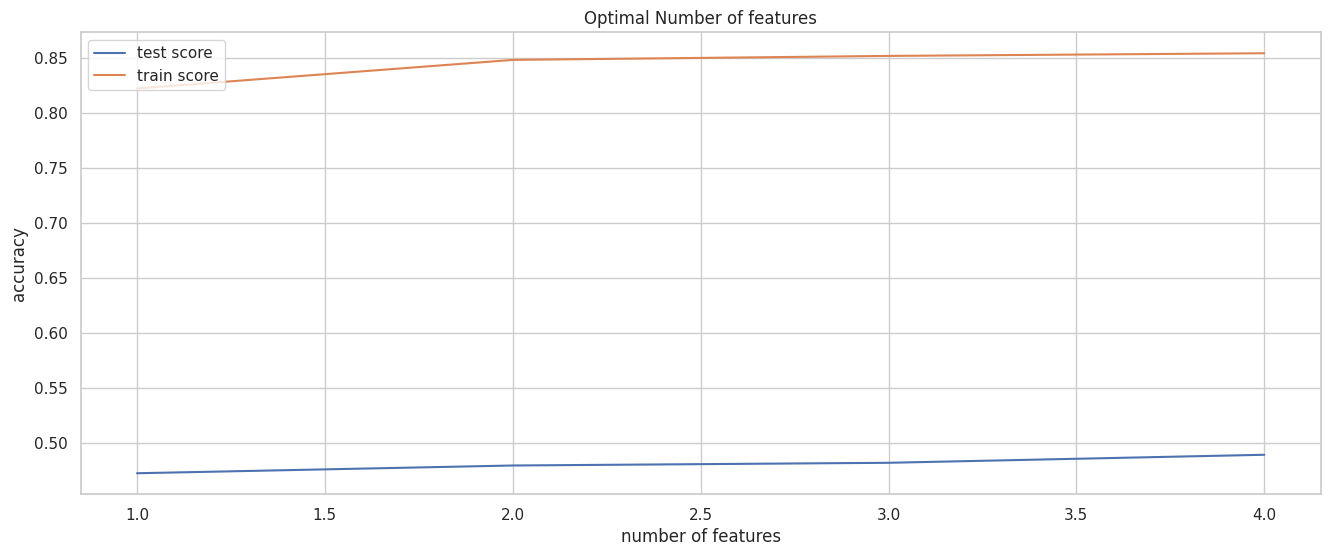

In [122]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title('Optimal Number of features')
plt.legend(['test score', 'train score'], loc='upper left')

Inference:
The graph displays a stable training score as the number of features increases, suggesting that the model's ability to learn from the training data does not significantly change with the number of features. The fact that the test score is much lower than the training score at all feature levels indicates a possible overfitting.

Final Random forest model without PCA,

In [128]:
from sklearn.metrics import accuracy_score

n_features_optimal = 4

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


rfe = RFE(estimator=rf, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)

#y_pred = rfe.predict(X_test)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 53.27%


Inference:
After retraining the Random Forest model with the optimal number of features (4), the accuracy on the test set is 53.27%. This is relatively low compared to the training accuracy seen in earlier steps, further suggesting that the model may be overfitting to the training data or that the features do not capture all the variance necessary for prediction.

# 2. Gaussian Naïve Bayes

## 2.1 Training the data

In [92]:
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, y_train)
Y_prediction = gaussian.predict(principalComponents_train)
gaussian.score(principalComponents_train, y_train)
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

61.01


Inference:
The Gaussian Naive Bayes model has a training accuracy of 61.01%. This suggests the model fits the training data with moderate accuracy.

In [93]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[6868,  312],
       [4283,  321]])

Inference:
The confusion matrix for the training data indicates that the model predicted 6868 true negatives and 321 true positives. However, there were a significant number of false negatives (4283), indicating the model frequently predicted no purchase when the purchase was made. The number of false positives (312) was comparatively lower.

In [94]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.616     0.957     0.749      7180
        True      0.507     0.070     0.123      4604

    accuracy                          0.610     11784
   macro avg      0.562     0.513     0.436     11784
weighted avg      0.573     0.610     0.504     11784



## 2.2. Prediction on the test data

In [95]:
Y_prediction = gaussian.predict(principalComponents_test)
gaussian.score(principalComponents_test, y_test)
acc_gaussian_test = round(gaussian.score(principalComponents_test, y_test) * 100, 2)
print(acc_gaussian_test)

64.0


Inference:
The model's test set accuracy of 64.00% is slightly higher than the training accuracy. This indicates that the model generalizes to an extent but still performs with moderate accuracy on unseen data.

In [96]:
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1800,   85],
       [ 976,   86]])

Inference:
The confusion matrix for the test data shows a similar pattern to the training data, with a large number of true negatives (1800) and a small number of true positives (86).

In [97]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.648     0.955     0.772      1885
        True      0.503     0.081     0.139      1062

    accuracy                          0.640      2947
   macro avg      0.576     0.518     0.456      2947
weighted avg      0.596     0.640     0.544      2947



Final comment:
This model's performance indicates it has difficulty identifying true positive cases, both in the training and testing datasets.

## 2.3. Cross-validation

In [98]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# For accuracy
accuracy_score = cross_val_score(estimator=gaussian, X=principalComponents_train,
                                 y=y_train, cv=folds, scoring='accuracy')
print('The accuracy score is', accuracy_score)

# For precision
precision_score = cross_val_score(estimator=gaussian, X=principalComponents_train,
                                  y=y_train, cv=folds, scoring='precision')
print('The  precision is', precision_score)

# For recall
recall_score = cross_val_score(estimator=gaussian, X=principalComponents_train,
                                y=y_train, cv=folds, scoring='recall')
print('The recall score is', recall_score)

# For F1 score
f1_score = cross_val_score(estimator=gaussian, X=principalComponents_train,
                            y=y_train, cv=folds, scoring='f1')
print('The f1 score is', f1_score)

The accuracy score is [0.61052185 0.6164616  0.61349173 0.61009758 0.59380306]
The  precision is [0.5        0.52252252 0.45833333 0.5        0.50892857]
The recall score is [0.05664488 0.06380638 0.07341491 0.08813928 0.05943691]
The f1 score is [0.10176125 0.11372549 0.12655801 0.14986124 0.10644258]


# 3. Logistic Regression

In [99]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(acc_log)

61.13


Inference: This Logistic Regression model has a training accuracy of 61.13%, which is similar to the Gaussian Naive Bayes model previously done. This level of accuracy is moderate and suggests that the model fits the training data to a reasonable extent.

In [100]:
from sklearn.model_selection import cross_val_score,cross_val_predict
CVS=cross_val_score(logreg,principalComponents_train,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(logreg,principalComponents_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

[0.61074338 0.60997963 0.61125255]


array([[7133,   47],
       [4541,   63]])

Inference:
The cross validation scores are consistent with the training accuracy, indicating that the model's performance is stable across different subsets of the training data. However, the cross-validated confusion matrix shows a greater number of false negatives (4541) and smaller number of true positives (63)

In [101]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[7141,   39],
       [4542,   62]])

Inference:
The confusion matrix shows that the model has a high number of true negatives (7141) but a very low number of true positives (62), with a substantial number of false negatives (4542), indicating that the model is not effectively identifying the positive cases.

In [102]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.611     0.995     0.757      7180
        True      0.614     0.013     0.026      4604

    accuracy                          0.611     11784
   macro avg      0.613     0.504     0.392     11784
weighted avg      0.612     0.611     0.472     11784



Inference:

1. The precision is almost equal for both classes, but the recall for the False class is extremely high compared to the True class, which is very low (0.995 vs. 0.013). This significant discrepancy suggests the model is biased towards predicting the negative class.
2. The F1-score for the False class is high due to high precision and recall, but it is very low for the True class due to the very low recall.

In [103]:
Y_pred = logreg.predict(principalComponents_test)
acc_log_test = round(logreg.score(principalComponents_test, y_test) * 100, 2)
print(acc_log_test)

64.23


Inference:
This logistic regression model's accuracy on the test set is 64.23%, slightly higher than the training accuracy. This improvement in test accuracy as compared to training may suggest that the model is not overfitting.

In [104]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1871,   14],
       [1040,   22]])

Inference: The confusion matrix for the test data shows a similar pattern to the training data, with a large number of true negatives (1871) and a very small number of true positives (22), along with a high number of false negatives (1040).

Final comment:
This logistic regression model's performance on both the training and testing sets indicates a significant challenge in predicting positive outcomes (purchases). While the model is effective at predicting negative outcomes (no purchase), it has a high tendency to misclassify positive instances as negative, which results in a very low recall for the positive class.

# 4. Decision Tree Classifier algorithm

In [105]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,y_train)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(acc_dt)

86.16


The Decision Tree model achieved an accuracy of 86.16% on the training data, indicating a strong ability to fit the data.

In [106]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[7163,   17],
       [1614, 2990]])

The confusion matrix for the training data shows a high number of both true negatives (7163) and true positives (2990). The model made very few errors in false positives (17) but a significant number in false negatives (1614), which suggests some misclassification, particularly in predicting positive instances.

In [107]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.816     0.998     0.898      7180
        True      0.994     0.649     0.786      4604

    accuracy                          0.862     11784
   macro avg      0.905     0.824     0.842     11784
weighted avg      0.886     0.862     0.854     11784



In [108]:
Y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, y_test) * 100, 2)
print(acc_dt_test)

56.29


The model's accuracy drops significantly to 56.29% on the test set, which is a sign of overfitting.

In [109]:
predictions = decisiontree.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[1321,  564],
       [ 724,  338]])

The confusion matrix for the test data shows the model is less effective at correctly classifying both positive and negative instances compared to the training set. The model predicted only 338 true positives, resulting in a large number of false negatives (724).

In [110]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

       False      0.646     0.701     0.672      1885
        True      0.375     0.318     0.344      1062

    accuracy                          0.563      2947
   macro avg      0.510     0.510     0.508      2947
weighted avg      0.548     0.563     0.554      2947



In [111]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# For accuracy
accuracy_score = cross_val_score(estimator=decisiontree, X=principalComponents_train,
                                 y=y_train, cv=folds, scoring='accuracy')
print('The accuracy score is', accuracy_score)

# For precision
precision_score = cross_val_score(estimator=decisiontree, X=principalComponents_train,
                                  y=y_train, cv=folds, scoring='precision')
print('The  precision is', precision_score)

# For recall
recall_score = cross_val_score(estimator=decisiontree, X=principalComponents_train,
                                y=y_train, cv=folds, scoring='recall')
print('The recall score is', recall_score)

# For F1 score
f1_score = cross_val_score(estimator=decisiontree, X=principalComponents_train,
                            y=y_train, cv=folds, scoring='f1')
print('The f1 score is', f1_score)

The accuracy score is [0.45184557 0.46499788 0.47093763 0.46414934 0.45925297]
The  precision is [0.27771011 0.29698376 0.29036145 0.30175439 0.3194925 ]
The recall score is [0.26034858 0.28382838 0.26362625 0.2796518  0.27737226]
The f1 score is [0.2665135  0.2885906  0.27501463 0.28263337 0.28872848]


Final comment:
This decision tree model demonstrates a significant disparity between its ability to predict outcomes in the training set versus the test set, indicating overfitting. While it performs well on the training data, its performance degrades notably on the test set, particularly in its ability to predict true positives.


The high precision and low recall for the positive class suggests the model is overly conservative in predicting positive outcomes.

# 5. Linear Support Vector Machine (Linear SVC)

In [112]:
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(acc_svc)

61.09


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


This LinearSVC model has achieved a training accuracy of 61.09%, which is similar to the other models evaluated earlier.

In [113]:
predictions = svc.predict(principalComponents_train)
print(confusion_matrix(y_train, predictions))
print()
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

[[7145   35]
 [4550   54]]

              precision    recall  f1-score   support

       False      0.611     0.995     0.757      7180
        True      0.607     0.012     0.023      4604

    accuracy                          0.611     11784
   macro avg      0.609     0.503     0.390     11784
weighted avg      0.609     0.611     0.470     11784



The confusion matrix and the classification report indicate a major issue with the model's recall for the "True" class. It correctly predicts very few positive instances (54 out of 4604), resulting in a recall of just 0.012. This suggests that while the model can predict negative outcomes with high accuracy, it fails to identify the majority of positive cases

In [114]:
Y_pred=svc.predict(principalComponents_test)
acc_svc_test=round(svc.score(principalComponents_test, y_test) * 100, 2)
print(acc_svc_test)

64.17


The model's accuracy on the test data is slightly higher than the training's at 64.17%. This increase in accuracy indicates that the model is consistent in its predictions when applied to unseen data

In [115]:
predictions = svc.predict(principalComponents_test)
print(confusion_matrix(y_test, predictions))
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=3))

[[1870   15]
 [1041   21]]
              precision    recall  f1-score   support

       False      0.642     0.992     0.780      1885
        True      0.583     0.020     0.038      1062

    accuracy                          0.642      2947
   macro avg      0.613     0.506     0.409      2947
weighted avg      0.621     0.642     0.513      2947



As with the training set, the confusion matrix for the test set shows a very low number of true positives (21 out of 1062), suggesting that the model's issue with recall is persisting in the test data.

# **Testing and Training Scores of the above five models**

In [116]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,training_Score
Model,
Random Forest,86.16
Decision Tree,86.16
Logistic Regression,61.13
LinearSVC,61.09
gaussian,61.01


In [117]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Testing_Score
Model,
Logistic Regression,64.23
LinearSVC,64.17
gaussian,64.00
Random Forest,59.79
Decision Tree,56.29


Inferences:
1. The Random Forest and Decision Tree models have the highest training scores at 86.16%, indicating a strong fit to the training data.

2. Logistic Regression, LinearSVC, and Gaussian Naive Bayes models have similar training scores, around 61%.

3. When considering the testing scores, the Logistic Regression model performs the best at 64.23%, closely followed by LinearSVC at 64.17% and Gaussian Naive Bayes at 64.00%. These models seem to generalize better to unseen data compared to the tree-based models.

4. The Random Forest model's testing score drops to 59.79%, and the Decision Tree model decreases further to 56.29%, which confirms the suspicion of overfitting seen in the training scores. These models do not perform as well on the test set, indicating a loss in generalization ability.